In [14]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import sqlite3
from scipy.stats import binned_statistic
import rubin_sim.maf as maf
import healpy as hp

In [10]:
bundleList = []

nside=64
metric = maf.CountMetric(col='night')
sql = 'visitExposureTime > 20 and note not like "%%DD%%"' 

slicer = maf.HealpixSlicer(
        nside=nside)

bundle = maf.MetricBundle(
            metric,
            slicer,
            sql)
bundleList.append(bundle)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


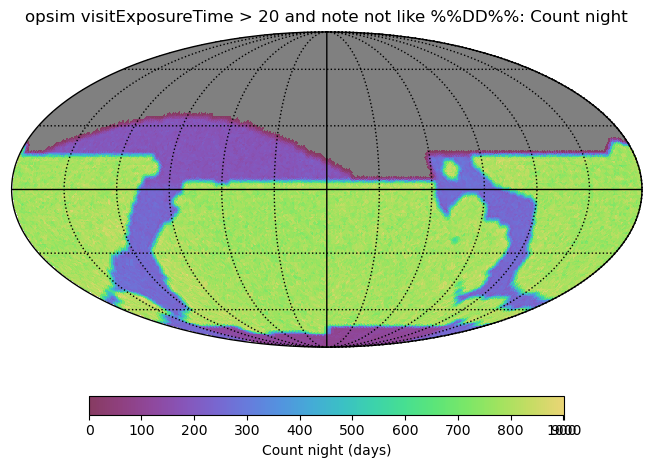

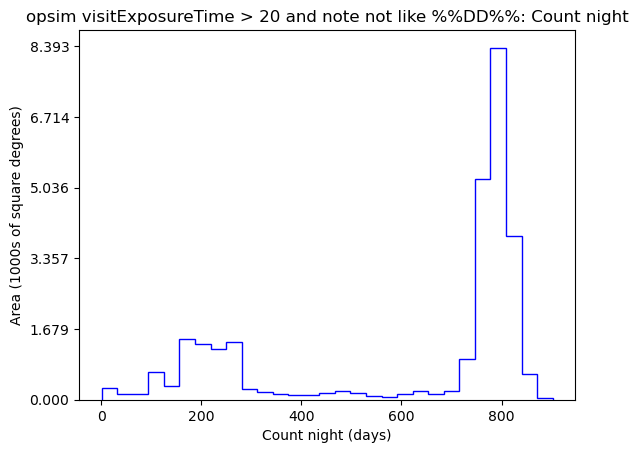

In [11]:
bg = maf.MetricBundleGroup(bundleList, 'draft_connected_v2.99_10yrs.db', 'temp', None)
bg.runAll()
bg.plotAll(closefigs=False)

In [25]:
close_pix = np.where((bundle.metricValues > 720) & (bundle.metricValues < 780))

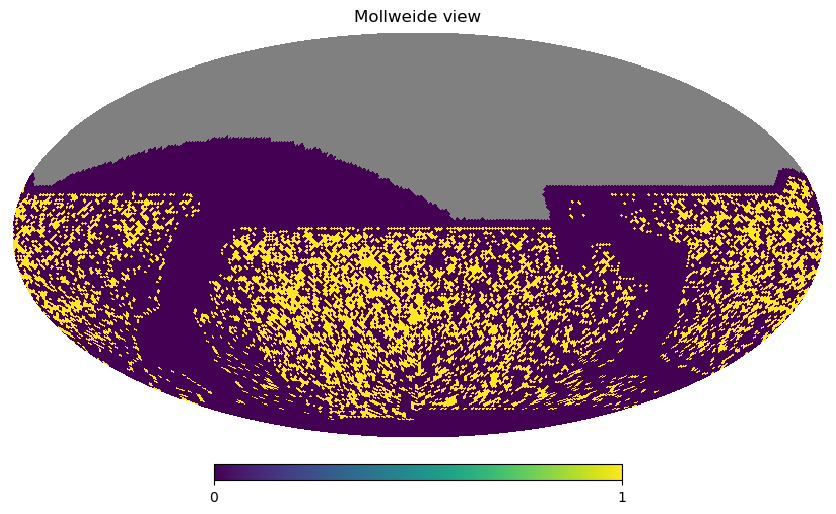

In [26]:
ack = bundle.metricValues *0
ack[close_pix] = 1
hp.mollview(ack)

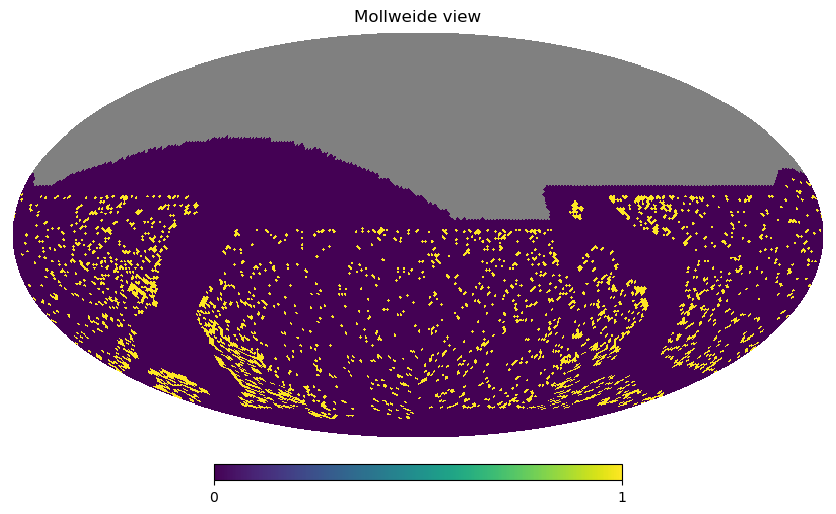

In [24]:
over_pix = np.where((bundle.metricValues > 820))
ack = bundle.metricValues *0
ack[over_pix] = 1
hp.mollview(ack)

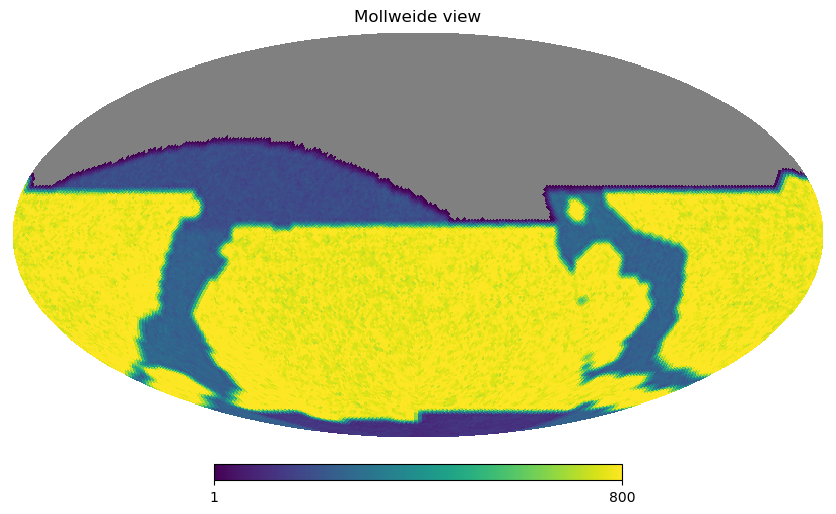

In [30]:
hp.mollview(bundle.metricValues, max=800)